# Post Hoc Analysis After 11/5/23

In [783]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns
import statistics 
from collections import OrderedDict
import csv
import re

In [784]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [785]:
infiles

('/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/2nd Cohort/AD19-D2/Videos/030724-Face Groom/predictions_5_behav.npy',)

In [786]:
Random_List = [] #creates a array known as random list 
for f in range(len(infiles)):
    arr = np.load(infiles[f])
    Random_List.extend(arr) 
#print(Random_List)

# Total Time of Video in deciseconds

In [787]:
duration_in_deciseconds = len(Random_List)
duration_in_minutes = duration_in_deciseconds / 600
duration_in_frames = duration_in_deciseconds * 3

print('This video is', duration_in_deciseconds, 'deciseconds, which is', duration_in_minutes, 'minutes, which is', duration_in_frames, 'frames')
#print(Random_List)

This video is 39481 deciseconds, which is 65.80166666666666 minutes, which is 118443 frames


## Creating Array

## Time Integration (deciseconds) 

In [788]:
BehaviorTime = []

for index, value in enumerate(Random_List):
    BehaviorTime.append((value, index))

In [789]:
#print(BehaviorTime)

### Ensures you only analyze expected length of  Session 


length_of_session = (int(input("How long was the session in minutes?"))) * 600
print(length_of_session)
BehaviorTime = BehaviorTime[:(length_of_session+1)]

#### Removes all info after selected end time 

In [790]:
print('This video is ', len(BehaviorTime), ' deciseconds, which is', (len(BehaviorTime)/600), 'minutes' )
print()
#print(BehaviorTime)

This video is  39481  deciseconds, which is 65.80166666666666 minutes



## Adds Stim Count and Frame Rate to Array 

In [791]:
for z in BehaviorTime:
    behavior = z[0]
    time= z[1]
behavior_type_and_duration = []
current_behavior = BehaviorTime[0][0]
current_time = BehaviorTime[0][1]  
duration = 0
stim_count=0
frames = 0

for behavior, time in BehaviorTime:
    if behavior == current_behavior:
        duration += 1
        if duration == 1:
            start_time= current_time
    else:
        if duration==1:
            end_time=start_time+1
        else:
            end_time= start_time + duration
        frames= duration*3
        stim_count= round(duration/3)
        behavior_type_and_duration.append((current_behavior, duration,frames,stim_count,start_time, end_time))
        current_behavior = behavior
        current_time = time
        start_time= time
        duration = 1
        end_time= time+1
        
# Append the final (current_behavior, current_time, count) tuple outside the loop
behavior_type_and_duration.append((current_behavior, duration, frames, stim_count, start_time, end_time))

# Make a copy of the original behavior_type_and_duration list
behaviortdt= list(behavior_type_and_duration)

In [792]:
#print(behaviortdt)
#print(len(behaviortdt))

In [793]:
#length_of_session = (int(input("How long was the session in minutes?"))) * 600 
#print(length_of_session) 
behaviortdt = [tup for tup in behaviortdt if tup[4] <= 39000]
behaviortdt=[tup for tup in behaviortdt if tup[1]<= 5]
count_greater_than_5 = sum(1 for tup in behaviortdt if tup[1] > 5)

In [794]:
print('This video is ', behaviortdt[-1][-1], ' deciseconds, which is', (behaviortdt[-1][-1]/600), 'minutes' )
print("Number of tuples with a second element greater than 5 :", count_greater_than_5)
print()
#print(behaviortdt)

This video is  38993  deciseconds, which is 64.98833333333333 minutes
Number of tuples with a second element greater than 5 : 0



## Add Bout Count to the Array 

In [795]:
enumerated_behaviortdt = []
behavior_index = {}  # Dictionary to store behavior and its corresponding index

for behavior, duration, frames, stim_count, start_time, end_time in behaviortdt:
    if behavior not in behavior_index:
        behavior_index[behavior] = 1
    else:
        behavior_index[behavior] += 1
    
    bout = behavior_index[behavior]
    enumerated_behaviortdt.append((behavior,stim_count,frames, bout, duration,start_time,end_time))

#print(enumerated_behaviortdt)

# Stim Count Calcultaion

In [796]:
#BCBDT = []

# Calculate durations and update BCBDT
#for behavior, duration, frames, bout, start_time, end_time in enumerated_behaviortdt:
    #stim_count = round(duration / 3)
    #if stim_count < 1:
        #stim_count = 0
    #if stim_count > 0:
        #BCBDT.append((behavior, duration, frames, bout, stim_count, start_time, end_time))

# Print the modified BCBDT
#print("Modified BCBDT:", BCBDT)

# Assign enumerated_behaviortdt to BCBDST
BCBDST = enumerated_behaviortdt


In [797]:
behavior_labels = {
    0.0: "Left Turns",
    1.0: "Right Turns",
    2.0: "Locomotion",
    3.0: "Face Groom",
    4.0: "All Other Groom",
    5.0: "All Other",
}

bdbt_dict = {}  # Dictionary to store lists of behaviors

for behavior,stim_count,frames, bout, duration,start_time,end_time in BCBDST:
    behavior_label = behavior_labels.get(behavior, "Unknown Behavior")
    if behavior_label not in bdbt_dict:
        bdbt_dict[behavior_label] = []
    bdbt_dict[behavior_label].append((behavior,stim_count,frames, bout, duration,start_time,end_time))


In [798]:


print(bdbt_dict)

{'All Other': [(5.0, 1, 12, 1, 4, 0, 4), (5.0, 2, 15, 2, 5, 5, 10), (5.0, 0, 3, 3, 1, 55, 56), (5.0, 0, 3, 4, 1, 59, 60), (5.0, 1, 9, 5, 3, 67, 70), (5.0, 1, 6, 6, 2, 71, 73), (5.0, 0, 3, 7, 1, 89, 90), (5.0, 1, 6, 8, 2, 122, 124), (5.0, 0, 3, 9, 1, 138, 139), (5.0, 1, 9, 10, 3, 144, 147), (5.0, 0, 3, 11, 1, 180, 181), (5.0, 0, 3, 12, 1, 182, 183), (5.0, 1, 6, 13, 2, 195, 197), (5.0, 0, 3, 14, 1, 216, 217), (5.0, 1, 9, 15, 3, 228, 231), (5.0, 1, 6, 16, 2, 316, 318), (5.0, 0, 3, 17, 1, 330, 331), (5.0, 1, 6, 18, 2, 415, 417), (5.0, 0, 3, 19, 1, 423, 424), (5.0, 1, 12, 20, 4, 432, 436), (5.0, 0, 3, 21, 1, 492, 493), (5.0, 0, 3, 22, 1, 498, 499), (5.0, 0, 3, 23, 1, 500, 501), (5.0, 1, 6, 24, 2, 502, 504), (5.0, 0, 3, 25, 1, 505, 506), (5.0, 1, 6, 26, 2, 542, 544), (5.0, 1, 9, 27, 3, 545, 548), (5.0, 0, 3, 28, 1, 550, 551), (5.0, 0, 3, 29, 1, 552, 553), (5.0, 0, 3, 30, 1, 554, 555), (5.0, 0, 3, 31, 1, 558, 559), (5.0, 1, 6, 32, 2, 588, 590), (5.0, 1, 9, 33, 3, 600, 603), (5.0, 0, 3, 34, 1,

In [799]:
keys_list = bdbt_dict.keys()
print(keys_list)

dict_keys(['All Other', 'Left Turns', 'Locomotion', 'Right Turns', 'All Other Groom', 'Face Groom'])


In [800]:
duration_list=[]
for key, value in bdbt_dict.items():
    if key =="Face Groom":
        for x in value:
            if x[5]>3000 and x[6]<=21000:
                duration_conversion=x[4]*100
                duration_list.append(duration_conversion)
print(duration_list)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 200, 100, 100, 100, 100, 100, 300, 100, 100, 100, 400, 100, 100, 100, 200, 500, 100, 100, 100, 100, 100, 100, 100, 100, 200, 100, 200, 300, 200, 100, 100, 300, 300, 100, 100, 200, 100, 100, 300, 100, 100, 100, 200, 100, 100, 200, 100, 100, 100, 200, 100, 100, 100, 300, 300, 100, 300, 300, 200, 100, 100, 100, 500, 200, 300, 200, 100, 100, 200, 100, 100, 500, 400, 100, 300, 500, 200, 100, 500, 200, 100, 200, 100, 100, 100, 100]


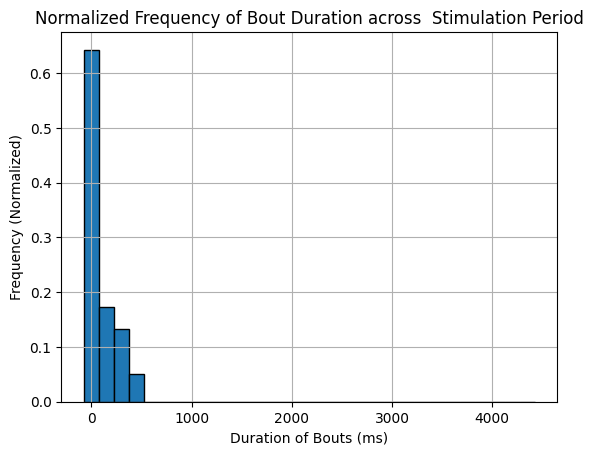

In [801]:
# Convert duration_list to a NumPy array
duration_array = np.array(duration_list)

# Define the bins based on duration
bins = np.arange(0, 4501, 150)  # Bins from 0 to 21000 with 150 ms interval

# Compute the frequency distribution using np.histogram()
frequency, bin_edges = np.histogram(duration_array, bins=bins)

# Calculate total count of durations
total_count = len(duration_array)

# Normalize the frequency counts
frequency_normalized = frequency / total_count

# Plot the histogram
plt.bar(bin_edges[:-1], frequency_normalized, width=150, edgecolor='black')  # width=150 for bin width

# Set labels and title
plt.xlabel('Duration of Bouts (ms)')
plt.ylabel('Frequency (Normalized)')
plt.title('Normalized Frequency of Bout Duration across  Stimulation Period')

# Show the plot
plt.grid(True)
plt.show()

In [802]:

# Print the bin edges
print(bin_edges)

[   0  150  300  450  600  750  900 1050 1200 1350 1500 1650 1800 1950
 2100 2250 2400 2550 2700 2850 3000 3150 3300 3450 3600 3750 3900 4050
 4200 4350 4500]


## Stim Count and Average Duration 

In [803]:
from tabulate import tabulate
stimcount_by_key = {}

def round_float(value):
    return round(value, 3)

for key, tuples_list in bdbt_dict.items():
    stimcount = [tuple_item[1] for tuple_item in tuples_list]
    sum_of_stimcount = sum(stimcount)
    stimcount_by_key[key] = sum_of_stimcount

table_data = [(key, round_float(sum_value)) for key, sum_value in stimcount_by_key.items()]
headers = ["Key", "Total Number of Stimulations"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

average_duration_by_key = {}

for key, tuples_list in bdbt_dict.items():
    durations = [tuple_item[4] for tuple_item in tuples_list]
    average_duration = ((sum(durations) / len(durations))/10)
    average_duration_by_key[key] = round_float(average_duration)

table_data = [(key, avg_duration) for key, avg_duration in average_duration_by_key.items()]
headers = ["Key", "Average Duration(seconds)"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

stim_block_stim_count_by_key = {}

for key, tuples_list in bdbt_dict.items():
    sum_of_stimcount = 0
    for tuple_item in tuples_list:
        if tuple_item[5]> 3000 and tuple_item[6] <= 21000:  
            sum_of_stimcount += tuple_item[1]
    stim_block_stim_count_by_key[key] = sum_of_stimcount

table_data = [(key, round_float(sum_value)) for key, sum_value in stim_block_stim_count_by_key.items()]
headers = ["Key", "Total Stimulations during 30-Min Stim Block"]
#for (key, value) in stim_block_stim_count_by_key:
    #print(key)
    #print(value)
table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

average_duration_30min_by_key = {}

for key, tuples_list in bdbt_dict.items():
    total_duration = 0  # Initialize the total duration to 0
    count = 0  # Initialize a count variable to track the number of valid tuples
    
    for tuple_item in tuples_list:
        if tuple_item[5] > 3000 and tuple_item[6] <= 21000:  # Check the conditions
            total_duration += tuple_item[4]  # Add the duration to the total
            count += 1  # Increment the count
            
    if count > 0:
        average_duration = round(((total_duration / count)/10), 2)  # Calculate average and round it
    else:
        average_duration = 0  # Set average to 0 if there are no valid tuples
    
    average_duration_30min_by_key[key] = average_duration

# Printing the results in a tabular format
table_data = [(key, avg_duration) for key, avg_duration in average_duration_30min_by_key.items()]
headers = ["Key", "Average Duration During 30 Min Stim Block (seconds)"]

from tabulate import tabulate

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)




+-----------------+------------------------------+
|       Key       | Total Number of Stimulations |
+-----------------+------------------------------+
|    All Other    |             1461             |
|   Left Turns    |             536              |
|   Locomotion    |             1027             |
|   Right Turns   |             513              |
| All Other Groom |              3               |
|   Face Groom    |             110              |
+-----------------+------------------------------+
+-----------------+---------------------------+
|       Key       | Average Duration(seconds) |
+-----------------+---------------------------+
|    All Other    |           0.225           |
|   Left Turns    |           0.176           |
|   Locomotion    |           0.211           |
|   Right Turns   |           0.182           |
| All Other Groom |           0.109           |
|   Face Groom    |           0.157           |
+-----------------+---------------------------+
+---------

##  Number of Bouts

In [804]:
bout_by_key = {}

for key, tuples_list in bdbt_dict.items():
    bouts = [tuple_item[3] for tuple_item in tuples_list]
    sum_of_bouts = len(bouts)
    bout_by_key[key] = sum_of_bouts

table_data = [(key, sum_value) for key, sum_value in bout_by_key.items()]
headers = ["Key", "Total Bouts"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

stim_block_bout_count_by_key = {}

for key, tuples_list in bdbt_dict.items():
    bout_count = sum(1 for tuple_item in tuples_list if 3000 < tuple_item[5] and tuple_item[6] <= 21000)
    stim_block_bout_count_by_key[key] = bout_count

table_data = [(key, count) for key, count in stim_block_bout_count_by_key.items()]
headers = ["Key", "30 minute Stim Block Bout Count"]

table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

+-----------------+-------------+
|       Key       | Total Bouts |
+-----------------+-------------+
|    All Other    |    2133     |
|   Left Turns    |    1115     |
|   Locomotion    |    1736     |
|   Right Turns   |    1045     |
| All Other Groom |     33      |
|   Face Groom    |     289     |
+-----------------+-------------+
+-----------------+---------------------------------+
|       Key       | 30 minute Stim Block Bout Count |
+-----------------+---------------------------------+
|    All Other    |               951               |
|   Left Turns    |               520               |
|   Locomotion    |               787               |
|   Right Turns   |               486               |
| All Other Groom |                2                |
|   Face Groom    |               98                |
+-----------------+---------------------------------+


## Folder Split 

In [805]:
for file_path in infiles: # if taking from Z Drive 
    folders = (os.path.dirname(file_path)).split('/')
    print(folders)
    print(len(folders))
    if len(folders) >= 4:  # Check if there are at least 4 elements in the list
        folder_name = folders[-1].lower()
        fol = re.split(r'[-\s]+', folder_name)

        if len(fol) >= 2:  # Check if there are at least 2 elements in the 'fol' list
            if fol[1] == 'face':
                # Merge 'face' and 'groom' into a single folder
                fol[1] = 'face groom'
                fol.pop(2)

            print(fol)
            print(len(fol))
        else:
            print("Folder name does not contain at least two elements.")
    else:
        print("Not enough elements in the folders list.")

['', 'Users', 'kaycei', 'K on Server (NoMachine)', 'KayCei', 'Naturalistic Closed Loop', '2nd Cohort', 'AD19-D2', 'Videos', '030724-Face Groom']
10
['030724', 'face groom']
2


## Session Type 

In [806]:
trial_type = "Stim Session"
sham_session = "n"  # Initialize sham_session to "n" by default

# Check if either "Sham" or 'sham' is in the string 'fol'
if "Sham" in fol or 'sham' in fol:
    sham_session = "y"

# Check if sham_session (converted to lowercase) is "y"
if sham_session.lower() == "y":
    trial_type = "Sham Session"

print(sham_session)
print(trial_type)


n
Stim Session


## Behavior of Interest

In [807]:
behavior_mapping = {
    0: "Left Turn ",
    1: "Right Turn ",
    2: "Locomotion ",
    3: "Face Groom ",
    4: "All Other Groom ",
    5: "All Other "
}

print("Please select the behavior of interest:")
for key, value in behavior_mapping.items():
    print(f"{key}: {value}")
# Assuming fol[1] contains the behavior label
if trial_type== "Stim Session":
    fol_label = fol[1].lower()  # Convert to lowercase for case-insensitive comparison

    # Check if the fol_label is "rt" or "RT" and set behavior_of_interest_1 accordingly
    if fol_label == 'rt':
        behavior_of_interest_1 = 1
    elif fol_label =='locomotion':
        behavior_of_interest_1 = 2
    elif fol_label == 'left turn':
        behavior_of_interest_1=0
    elif fol_label=='face groom':
        behavior_of_interest_1=3
    elif fol_label== 'all other groom':
        behavior_of_interest_1=4
    elif fol_label=='all other':
        behavior_of_interest_1=5


    behavior_name_2 = behavior_mapping.get(behavior_of_interest_1, "Unknown")
else:
    behavior_name_2= 'None'
    
print("Selected behavior of interest:", behavior_name_2)


Please select the behavior of interest:
0: Left Turn 
1: Right Turn 
2: Locomotion 
3: Face Groom 
4: All Other Groom 
5: All Other 
Selected behavior of interest: Face Groom 


## Type of Fiber Connection

In [808]:
if len(fol)>=3:
    print(len(fol))
    fol_label = fol[2].lower() 
    print(fol_label)
    if fol_label=='bilateral':
        type_of_fiber_connection = 'Bilateral'
    elif fol_label=='contralateral'or fol_label=='contra':
        type_of_fiber_connection = 'Contralateral'
    elif fol_label=='ipsilateral'or fol_label=='ipsi':
        type_of_fiber_connection = 'Ipsilateral'
    else:
        type_of_fiber_connection = 'Bilateral'
else:
    type_of_fiber_connection = 'Bilateral'


#selection = input("Please enter the type of fiber connection for the trial (B for Bilateral, I for Ipsilateral, C for Contralateral): ")


print("Selected type of fiber connection:", type_of_fiber_connection)


Selected type of fiber connection: Bilateral


### Round Array Dict(BDBT) and create JSON Strings of Values

In [809]:
rounded_dict = {}

for key, value_list in bdbt_dict.items():
    rounded_values = [
        (
            round(v[0]),     # Rounding and converting to integer
            v[1], v[2], v[3], v[4],
            round(v[5], 2),  # Rounding the sixth float value
            round(v[6], 2)   # Rounding the seventh float value
        )
        for v in value_list
    ]
    rounded_dict[key] = rounded_values

#print(rounded_dict)

bdbt_dict=rounded_dict
#print(bdbt_dict)

# Convert values to JSON strings

import json
json_data = {key: json.dumps(value) for key, value in bdbt_dict.items()}
bdbt_dict=json_data 
#print(bdbt_dict)

### Mouse Name, Genotype, and Date

In [810]:
# Iterate through each file in infiles
for file_path in infiles: # if taking from K Drive on home machine
    folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    mouse_name = folders[7].split('-')[0]
    # Extract the genotype from the file path
    genotype = folders[7].split('-')[1]
    # Extract the date from the file path
    date = folders[-1].split('-')[0]
#for file_path in infiles: # if taking from Z Drive 
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[4].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[4].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]
#for file_path in infiles:   #if taking files from D drive
    #folders = (os.path.dirname(file_path)).split('/')
    #print(folders)
    # Extract the mouse name from the file path
    #mouse_name = folders[6].split('-')[0]
    # Extract the genotype from the file path
    #genotype = folders[6].split('-')[1]
    # Extract the date from the file path
    #date = folders[-1].split('-')[0]    

In [811]:
bdbt_dict.keys()

dict_keys(['All Other', 'Left Turns', 'Locomotion', 'Right Turns', 'All Other Groom', 'Face Groom'])

In [812]:
filtered_df=[]
session_number=0
#If on home machine
db_file_path = "/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic_cleaned.pkl"
#If on Lab Computer
#db_file_path="K:/KayCei/Naturalistic.pkl"
 # Check if the pickle file exists
if os.path.exists(db_file_path):
    # If the file exists, load the existing DataFrame
    with open(db_file_path, 'rb') as f:
        df = pickle.load(f)
else:
    # If the file doesn't exist, create a new DataFrame
    df = pd.DataFrame(columns=["Mouse","Genotype","Date","Selected Behavior","Session Type","Session Number","Fiber Connection",
                               "Right Turn Array","Total Right Turn Bout Count","Average Duration of Right Turn(seconds)",
                               "Total Right Turn Bouts in Stim Block","Right Turn Average Duration in Stim Block(seconds)",
                               "Left Turn Array","Total Left Turn Bout Count","Average Duration of Left Turn(seconds)",
                               "Total Left Turn Bouts in Stim Block","Left Turn Average Duration in Stim Block(seconds)",
                               "Locomotion Array","Total Locomotion Bout Count","Average Duration of Locomotion(seconds)",
                               "Total Locomotion Bouts in Stim Block","Locomotion Average Duration in Stim Block(seconds)",
                               "Face Groom Array","Total Face Groom Bout Count","Average Duration of Face Groom(seconds)",
                               "Total Face Groom Bouts in Stim Block","Face Groom Average Duration in Stim Block(seconds)",
                               "All Other Groom Array","Total All Other Groom Bout Count","Average Duration of All Other Groom(seconds)",
                               "Total All Other Groom Bouts in Stim Block","All Other Groom Average Duration in Stim Block(seconds)",
                               "All Other Array","Total All Other Bout Count","Average Duration of All Other(seconds)",
                               "Total All Other Bouts in Stim Block","All Other Average Duration in Stim Block(seconds)",
                              ])
new_animal_data = {
        "Mouse":mouse_name,
        "Genotype":genotype,
        "Date":date,
        "Selected Behavior":behavior_name_2,
        "Session Type":trial_type,  
        "Session Number":session_number,
        "Fiber Connection":type_of_fiber_connection,
        "Right Turn Array":bdbt_dict.get('Right Turns'),
        "Total Right Turn Bout Count":bout_by_key.get('Right Turns'),
        "Average Duration of Right Turn(seconds)":average_duration_by_key.get('Right Turns'),
        "Total Right Turn Bouts in Stim Block":stim_block_bout_count_by_key.get('Right Turns'),
        "Right Turn Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('Right Turns'),
        "Left Turn Array":bdbt_dict.get('Left Turns'),
        "Total Left Turn Bout Count":bout_by_key.get('Left Turns'),
        "Average Duration of Left Turn(seconds)":average_duration_by_key.get('Left Turns'),
        "Total Left Turn Bouts in Stim Block":stim_block_bout_count_by_key.get('Left Turns'),
        "Left Turn Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('Left Turns'),
        "Locomotion Array":bdbt_dict.get('Locomotion'),
        "Total Locomotion Bout Count":bout_by_key.get('Locomotion'),
        "Average Duration of Locomotion(seconds)":average_duration_by_key.get('Locomotion'),
        "Total Locomotion Bouts in Stim Block":stim_block_bout_count_by_key.get('Locomotion'),
        "Locomotion Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('Locomotion'),
        "Face Groom Array":bdbt_dict.get('Face Groom'),
        "Total Face Groom Bout Count":bout_by_key.get('Face Groom'),
        "Average Duration of Face Groom(seconds)":average_duration_by_key.get('Face Groom'),
        "Total Face Groom Bouts in Stim Block":stim_block_bout_count_by_key.get('Face Groom'),
        "Face Groom Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('Face Groom'),
        "All Other Groom Array":bdbt_dict.get('All Other Groom'),
        "Total All Other Groom Bout Count":bout_by_key.get('All Other Groom'),
        "Average Duration of All Other Groom(seconds)":average_duration_by_key.get('All Other Groom'),
        "Total All Other Groom Bouts in Stim Block":stim_block_bout_count_by_key.get('All Other Groom'),
        "All Other Groom Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('All Other Groom'),
        "All Other Array":bdbt_dict.get('All Other'),
        "Total All Other Bout Count":bout_by_key.get('All Other'),
        "Average Duration of All Other(seconds)":average_duration_by_key.get('All Other'),
        "Total All Other Bouts in Stim Block":stim_block_bout_count_by_key.get('All Other'),
        "All Other Average Duration in Stim Block(seconds)":average_duration_30min_by_key.get('All Other'),}
 

In [813]:
import os
import pickle
import pandas as pd

def rearrange_session_numbers(filtered_df):
    # Sort filtered DataFrame by date
    filtered_df.sort_values(by='Date', inplace=True)

    # Assign session numbers based on the sorted order
    filtered_df['Session Number'] = range(1, len(filtered_df) + 1)

    return filtered_df

def add_animal_to_database(db_file_path, new_animal_data, mouse_name, genotype, date, behavior_name_2, trial_type, type_of_fiber_connection,filtered_df):
    # Check if the pickle file exists
    if os.path.exists(db_file_path):
        # If the file exists, load the existing DataFrame
        with open(db_file_path, 'rb') as f:
            df = pickle.load(f)
    else:
        # If the file doesn't exist, create a new DataFrame
        df = pd.DataFrame(columns=["Mouse","Genotype","Date","Selected Behavior","Session Type","Session Number","Fiber Connection",
                                   "Right Turn Array","Total Right Turn Bout Count","Average Duration of Right Turn(seconds)",
                                   "Total Right Turn Bouts in Stim Block","Right Turn Average Duration in Stim Block(seconds)",
                                   "Left Turn Array","Total Left Turn Bout Count","Average Duration of Left Turn(seconds)",
                                   "Total Left Turn Bouts in Stim Block","Left Turn Average Duration in Stim Block(seconds)",
                                   "Locomotion Array","Total Locomotion Bout Count","Average Duration of Locomotion(seconds)",
                                   "Total Locomotion Bouts in Stim Block","Locomotion Average Duration in Stim Block(seconds)",
                                   "Face Groom Array","Total Face Groom Bout Count","Average Duration of Face Groom(seconds)",
                                   "Total Face Groom Bouts in Stim Block","Face Groom Average Duration in Stim Block(seconds)",
                                   "All Other Groom Array","Total All Other Groom Bout Count","Average Duration of All Other Groom(seconds)",
                                   "Total All Other Groom Bouts in Stim Block","All Other Groom Average Duration in Stim Block(seconds)",
                                   "All Other Array","Total All Other Bout Count","Average Duration of All Other(seconds)",
                                   "Total All Other Bouts in Stim Block","All Other Average Duration in Stim Block(seconds)",
                                  ])

    # Check if the combination of mouse_name, genotype, and date already exists in the DataFrame
    existing_animal = df[(df['Mouse'] == mouse_name) & (df['Genotype'] == genotype) & (df['Date'] == date)]
    
    if not existing_animal.empty:
        print("Animal with the same name, genotype, and date already exists. Skipping addition.")
        return
    
    # Store the original indices of the DataFrame
    original_indices = df.index
    
    # Filter the DataFrame based on 'Animal Name', 'Genotype', and 'Session Type'
    filtered_df = df[(df['Mouse'] == new_animal_data['Mouse']) & 
                 (df['Genotype'] == new_animal_data['Genotype']) & 
                 (df['Session Type'] == new_animal_data['Session Type'])&
                 (df['Selected Behavior'] == new_animal_data['Selected Behavior'])&
                 (df['Fiber Connection'] == new_animal_data['Fiber Connection'])]
    # Print the filtered DataFrame
    #print(filtered_df)

    # If the filtered DataFrame is not empty, set the 'Session Number' to the number of occurrences plus 1
    if not filtered_df.empty:
        session_number = int(filtered_df.shape[0] + 1)
    else:
        # If the combination is new, set 'Session Number' to 1
        session_number = int(1)

    # Append the new animal data to the DataFrame
    new_animal_data['Session Number'] = session_number
    new_row = pd.DataFrame([new_animal_data])
    df = pd.concat([df, new_row], ignore_index=True)

    # Rearrange session numbers based on date only for the filtered DataFrame if it's not empty
    if not filtered_df.empty:
        filtered_df = rearrange_session_numbers(filtered_df)
        # Use the original indices to update the session numbers in the original DataFrame
        df.loc[original_indices.intersection(filtered_df.index), 'Session Number'] = filtered_df['Session Number']
    else:
        print("No data found for rearrangement. Skipping session number rearrangement.")

    # Save the updated DataFrame back to the pickle file
    with open(db_file_path, 'wb') as f:
        pickle.dump(df, f)

    print("New animal added to the database.")


In [814]:
print(mouse_name)

AD19


In [815]:
add_animal_to_database(db_file_path, new_animal_data, mouse_name, genotype, date, behavior_name_2, trial_type, type_of_fiber_connection,filtered_df)

New animal added to the database.


### Rearrange Session Number based on Date 

In [816]:
# Load the data from the PKL file into a DataFrame
data = pd.read_pickle(db_file_path)

# Group the data by unique combinations of values across multiple columns
grouped = data.groupby(['Mouse', 'Genotype', 'Session Type', 'Selected Behavior', 'Fiber Connection'])

# Define a function to sort each group by date and assign session numbers
def assign_session_numbers(group):
    # Sort the group by date
    group_sorted = group.sort_values(by='Date')
    # Assign session numbers based on the order of rows within the sorted group
    group_sorted['Session Number'] = range(1, len(group_sorted) + 1)
    return group_sorted

# Apply the function to each group
sorted_data = grouped.apply(assign_session_numbers)

# Reset the index of sorted_data to ensure correct alignment
sorted_data.reset_index(drop=True, inplace=True)

# Iterate over rows in sorted_data and update corresponding rows in data
for index, row in sorted_data.iterrows():
    # Find matching rows in data based on common columns
    mask = (data['Mouse'] == row['Mouse']) & (data['Genotype'] == row['Genotype']) & \
           (data['Session Type'] == row['Session Type']) & \
           (data['Selected Behavior'] == row['Selected Behavior']) & \
           (data['Fiber Connection'] == row['Fiber Connection']) & \
           (data['Date'] == row['Date'])
    # Update session number in data based on the match
    data.loc[mask, 'Session Number'] = row['Session Number']

# Display the updated data DataFrame
print(data.tail(4))

# Save the updated DataFrame to a new PKL file if needed
data.to_pickle(db_file_path)

/var/folders/9t/qv6qlpv10ylgs0y_f9_d4hkr0000gn/T/ipykernel_1753/38454680.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_data = grouped.apply(assign_session_numbers)


   Mouse Genotype    Date Selected Behavior  Session Type Session Number  \
93  AD19       D2  022224       Face Groom   Stim Session              1   
94  AD19       D2  030124       Right Turn   Stim Session              1   
95  AD19       D2  030624       Locomotion   Stim Session              2   
96  AD19       D2  030724       Face Groom   Stim Session              2   

   Fiber Connection                                   Right Turn Array  \
93        Bilateral  [[1, 1, 6, 1, 2, 2, 4], [1, 1, 9, 2, 3, 6, 9],...   
94    Contralateral  [[1, 1, 9, 1, 3, 3, 6], [1, 1, 6, 2, 2, 10, 12...   
95        Bilateral  [[1, 0, 3, 1, 1, 189, 190], [1, 1, 6, 2, 2, 35...   
96        Bilateral  [[1, 1, 6, 1, 2, 53, 55], [1, 0, 3, 2, 1, 57, ...   

   Total Right Turn Bout Count  Average Duration of Right Turn(seconds)  ...  \
93                         987                                    0.186  ...   
94                        1295                                    0.185  ...   
95      